In [1]:
import numpy as np
import matplotlib.pyplot as plt
import emcee 

In [2]:
a_b = np.array([0.0043, 0.2243, 0.1276, 0.228,
               0.1762, 0.147, 0.1015, 0.0041,
               0.1848, 0.0836, 0.0836, 0.0836,
               0.12])
a_p = np.array([0.0088, 0.7048, 2.72, 1.0896,
               0.6035, 0.4644, 0.353, 0.92,
               0.7903, 0.2956, 1, 0.6992, 0.4])

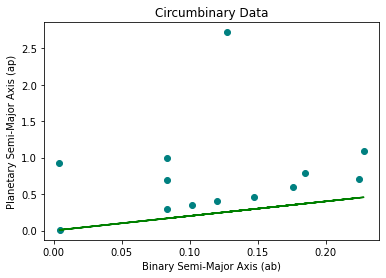

In [9]:
plt.figure()
plt.title('Circumbinary Data')
plt.xlabel('Binary Semi-Major Axis (ab)')
plt.ylabel('Planetary Semi-Major Axis (ap)')
plt.scatter(a_b, a_p, color='teal')

# plot the line a_p = 2a_b
plt.plot(a_b, 2*a_b, color='green')

In [3]:
""" Yes there seems to be a pile-up of circumbinary planets
around a_p = 2a_b"""

' Yes there seems to be a pile-up of circumbinary planets\naround a_p = 2a_b'

In [10]:
a_i = a_p/a_b
a_c = 2*a_b

In [9]:
""" Question 3"""

#def log_prior(a_c):
#    if 1 < a_c <= 5:
#        return 0
#    return -np.inf

#def log_likelihood(a_i, a_c):
#    if a_i >= a_c:
#        return 0
#    return -np.inf

#def log_probability(a_i, a_c):
    
#    lp = log_prior(a_c)
#    ll = log_likelihood(a_i, a_c)
    
#    if not np.isfinite(lp):
#        return -np.inf
#    return lp * ll

In [11]:
def log_prior(a_c):
    array = []
    for num in a_c:
        if 1 < num <= 5:
            array.append(0)
        array.append(-np.inf)
    return array

In [12]:
log_prior(a_c)

[-inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf]

In [13]:
def log_likelihood(a_c, a_i):
    array = []
    for flt, num in zip(a_c, a_i):
        if num >= flt:
            array.append(0)
        else:
            array.append(-np.inf)
    return array

In [14]:
log_likelihood(a_c, a_i)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [15]:
def log_probability(a_c, a_i):
    p_array = []
    lp = log_prior(a_c)
    ll = log_likelihood(a_c, a_i)

    for p,l in zip(lp,ll):
        if np.isfinite(lp) is False:
            p_array.append(-np.inf)
        p_array.append(p + l)
    return p_array

In [16]:
log_probability(a_c, a_i)

[-inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf]

In [41]:
ac_in = 2.0
pos = ac_in + 1e-4 * np.random.randn(32,1)
nwalkers, ndim = pos.shape

In [42]:
sampler = emcee.EnsembleSampler(nwalkers, ndim, log_probability, args=(a_i,))
sampler.run_mcmc(pos, 5000, progress=True)

100%|██████████| 5000/5000 [00:10<00:00, 483.84it/s]


State([[2.01809591]
 [1.33796107]
 [1.78239636]
 [1.57447651]
 [1.88149674]
 [1.84684759]
 [1.3148519 ]
 [1.81627153]
 [1.82272317]
 [1.74370475]
 [1.49130464]
 [1.6177753 ]
 [1.6700541 ]
 [1.41498752]
 [1.68293896]
 [1.39324487]
 [1.39020794]
 [1.32707641]
 [1.99760061]
 [1.724732  ]
 [1.67348693]
 [1.0627694 ]
 [1.73467158]
 [1.02198346]
 [1.53009222]
 [1.17464977]
 [1.31577351]
 [1.44463019]
 [1.99408753]
 [1.80219087]
 [1.40975022]
 [1.19380765]], log_prob=[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0.], blobs=[], random_state=('MT19937', array([3498880544,   71250290,  778154610, 2239391325,  576587991,
       2607825360, 1427747620, 4251988635,  293901739, 2272046028,
       1287591771, 2036007956, 2215199687, 3020288397, 2134342937,
       4216256630, 1141957111, 2771909504, 2464693995, 1731665889,
       2207229457, 3009251983, 1251679165, 1085149442, 3704461720,
       1362632378, 2259645148, 3129098928, 2138968192, 1299685222

Text(0.5, 0, 'step number')

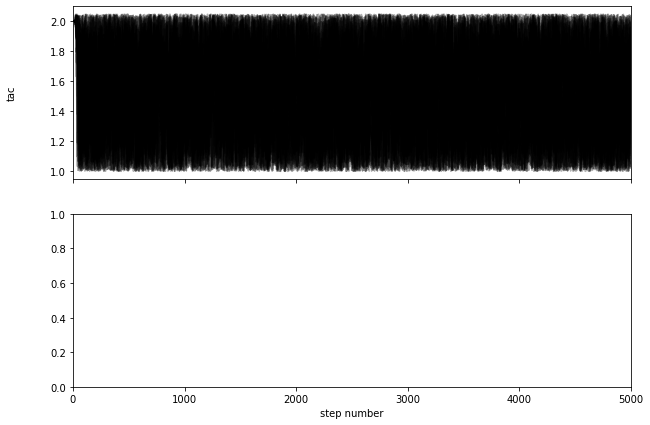

In [43]:
fig, axes = plt.subplots(2,figsize=(10,7), sharex = True)
samples = sampler.get_chain()
label = ["tac"]

for i in range(ndim):
    ax = axes[i]
    ax.plot(samples[:, :, i], "k", alpha=0.3)
    ax.set_xlim(0, len(samples))
    ax.set_ylabel(label[i])
    ax.yaxis.set_label_coords(-0.1, 0.5)
axes[-1].set_xlabel("step number")

In [44]:
tau = sampler.get_autocorr_time()
print(tau)

[26.66890665]


In [45]:
flat_samples = sampler.get_chain(discard=100, thin=13, flat=True)
print(flat_samples.shape)

(12032, 1)


In [46]:
import corner

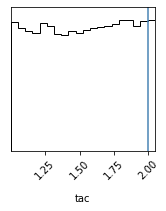

In [47]:
fig = corner.corner(flat_samples, labels=label, truths=[ac_in])

In [48]:
from IPython.display import display, Math

In [49]:
for i in range(ndim):
    mcmc = np.percentile(flat_samples[:, i], [50, 75, 95])
    q = np.diff(mcmc)
    txt = "\mathrm{{{3}}} = {0:.3f}_{{-{1:.3f}}}^{{{2:.3f}}}"
    txt = txt.format(mcmc[1], q[0], q[1], label)
    display(Math(txt))

<IPython.core.display.Math object>

In [50]:
""" ~a_c is constrained to 1.797 based on the above observations"""

' ~a_c is constrained to 1.797 based on the above observations'